<a href="https://colab.research.google.com/github/fbeilstein/algorithms/blob/master/lecture_02_math_prerequisites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Math Prerequisites

* O-notation and complexity
* what is a set, function/map
* numbers, bits/binary operations, hex
* elementary probability theory, bimomial coefficients
* elementary combinatorics
* formula for sum of arithmetic progression, formula for sum of geometric progression, formula for the sum of odd numbers
* prime numbers, divisors, GCD, GCR, modulo algebra
* elementary geometry: perimeter/area, rotations

# Complexity

**Family of Bachmann–Landau notations**

| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Notation&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Name | Description | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Formal Definition&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Limit Definition&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |
| --- | --- | --- | --- | --- |
| $f(n) = O(g(n))$ | Big O; Big Oh; Big Omicron | $|f|$ is bounded above by $g$ (up to constant factor) asymptotically | $\exists k > 0:  \exists n_0:  \forall n>n_0:  |f(n)|\leq k g(n)$ | $\limsup_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} < \infty$ |
| $f(n) = \Theta(g(n))$ | Big Theta | $f \text{ is bounded both above and below by } g \text{ asymptotically}$ | $\exists k_1 > 0 ~ \exists k_2>0 ~ \exists n_0 ~ \forall n > n_0 \text{ : } k_1 \cdot g(n) \leq f(n) \leq k_2 \cdot g(n)$ | $f(n) = O(g(n)) \text{ and } f(n) = \Omega(g(n)) \text{ (Knuth version)}$ |
| $f(n) = \Omega(g(n))$ | Big Omega in complexity theory (Knuth) | $f$ is bounded below by $g$ asymptotically | $\exists k > 0  \exists n_0  \forall  n>n_0\colon   f(n) \geq k\cdot g(n)$ | $\liminf_{n \to \infty} \frac{f(n)}{g(n)} > 0 $|
| $f(n) = o(g(n))$ | Small O; Small Oh | $f$ is dominated by $g$ asymptotically | $\forall k>0  \exists n_0  \forall n > n_0\colon  |f(n)| < k\cdot g(n)$ | $\lim_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} = 0$ |
| $f(n)\sim g(n)$ | On the order of | $f$ is equal to $g$ asymptotically | $\forall \varepsilon > 0 \exists n_0\forall n > n_0\colon \left| \frac{f(n)}{g(n)} - 1 \right|  < \varepsilon$ | $\lim_{n \to \infty} \frac{f(n)}{g(n)} = 1$ |
| $f(n) = \omega(g(n))$ | Small Omega | $f$ dominates $g$ asymptotically | $\forall k > 0 \exists n_0 \forall n > n_0 \colon$  $|f(n)| > k\cdot |g(n)|$ | $\lim_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} = \infty$ |
| $f(n) = \Omega(g(n))$ | Big Omega in number theory (Hardy-Littlewood) | $|f|$ is not dominated by $g$ asymptotically | $\exists k>0 \forall n_0 \exists n > n_0\colon |f(n)| \geq k\cdot g(n)$ | $\limsup_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} > 0 $ |

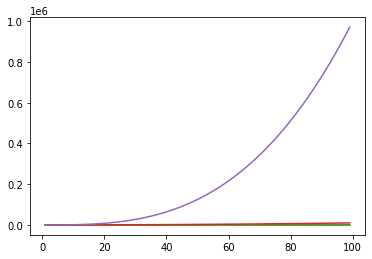

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = range(1, 100)
funcs = [lambda x: x * np.log(x), lambda x: np.log(x), lambda x: x, lambda x: np.power(x,2), lambda x: np.power(x,3)]
for f in funcs:
  plt.plot(x, f(x))

### Common misconceptions

* complexity $O(N)=O(N-k)=O(N/k)$

### Quiz

Simplify

* $O(n^2 + 2n + 3)$
* $O(2^n + n^3 - 5)$
* $O(n \ln(n) + n^{100})$
* $O(n^2 \ln(n) + 100 n \ln(n))$
* $O(\sqrt{n} + \ln(n) + 2 n)$
* $O(n/2 + 3)$
* $O(2^{n - 30} + n^2)$

Compare

* $O(n)$ and $O(2n)$
* $O((n + 5)^2)$ and $O(n^2/3)$

|time complexity|algorithm|
---|---
|$O(2^n)$|binary tree traversal on depth|
|$O(n^2)$| bubble sort of 1D array|
|$O(n\ln(n))$|merge sort, average for quicksort, heapsort, D&C|
|$O(n)$|max in array, two pointers|
|$O(\ln(n))$|binary search|
|$O(\sqrt{n})$|number of divisors|
|$O(1)$|closed-form formulas|
|$O(nm)$|2D matrix traversal|
|$O(v+e)$|bfs, dfs|

## Fibonacci in $O(2^n)$, $O(n)$, and $O(\ln(n))$

In [ ]:
def fib_rec(N):
  if N <= 1:
    return 1
  return fib_rec(N-1) + fib_rec(N-2)

%timeit fib_rec(20)

2.79 ms ± 81.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
def fib_iter(N):
  a, b = 1, 1
  for _ in range(N):
    a, b = b, a+b
  return a

%timeit fib_iter(1000)

217 µs ± 66.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
import numpy as np

def fib_matrix(N):
  M = np.array([[1,1],[1,0]])
  P = np.array([[1,0],[0,1]])
  while N:
    if 1 & N: P = np.dot(P,M);
    N = N // 2
    M = np.dot(M,M)
  return np.dot(P, np.array([1, 1]))[1]


%timeit fib_matrix(1000)

32.2 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


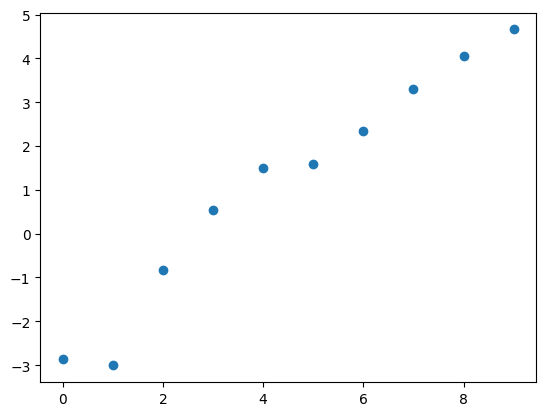

In [ ]:
from timeit import timeit
import numpy as np
import matplotlib.pyplot as plt

A = np.array(range(10))
T = []
for i in A:
  T.append(timeit('fib_rec(i)', 'from __main__ import fib_rec, i'))
T = np.array(T)
plt.scatter(A, np.log2(T))
plt.draw()
plt.show()

## Quiz

In [ ]:
lst = list(range(100))

for idx in range(len(lst)):
  pass

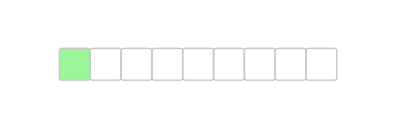

In [ ]:
lst = list(range(100))

for idx in range(len(lst)):
  pass

for idx in range(len(lst)):
  pass

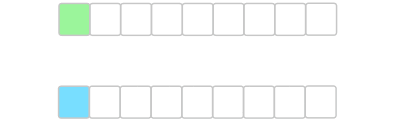

In [ ]:
lst = list(range(100))

for idx1 in range(len(lst)):
  for idx2 in range(3):
    ...

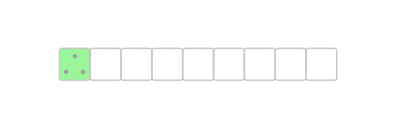

In [ ]:
lst = list(range(100))

for idx1 in range(len(lst)):
  for idx2 in range(len(lst)):
    ...

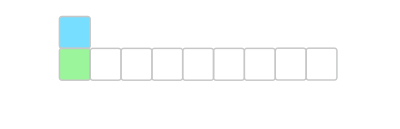

In [ ]:
lst = list(range(100))

for idx1 in range(len(lst)):
  for idx2 in range(idx1):
    ...

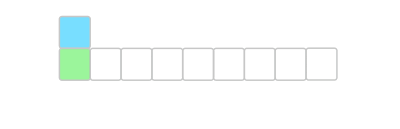

In [ ]:
lst = list(range(100))

idx1, idx2 = 0, 0

while idx1 < len(lst) and idx2 < len(lst):
  if ...:
    idx1 += 1
  else:
    idx2 += 1


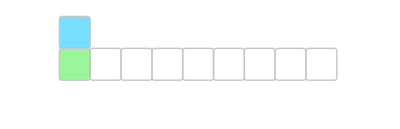

In [ ]:
lst = list(range(100))

idx1, idx2 = 0, len(lst) - 1

while idx1 < idx2:
  if ...:
    idx1 += 1
  else:
    idx2 -= 1


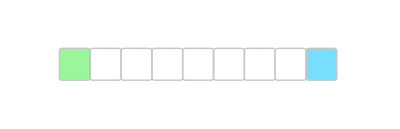

In [ ]:
def f(N):
  if N == 0: return 0
  f(N-1), f(N-1)

In [ ]:
def f(N):
  if N == 0: return 0
  for i in range(N-1):
    f(i)

In [ ]:
k = 15
def f(N):
  if N == 0: return 0
  for i in range(k):
    f(i)

In [ ]:
def b(L, R):
  if L == R: return ...
  if ...:
    b((L+R)/2,R)
  else:
    b(L, (L+R)/2)